<a href="https://colab.research.google.com/github/Rohan7Gupta/colab/blob/main/drude_lorentz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

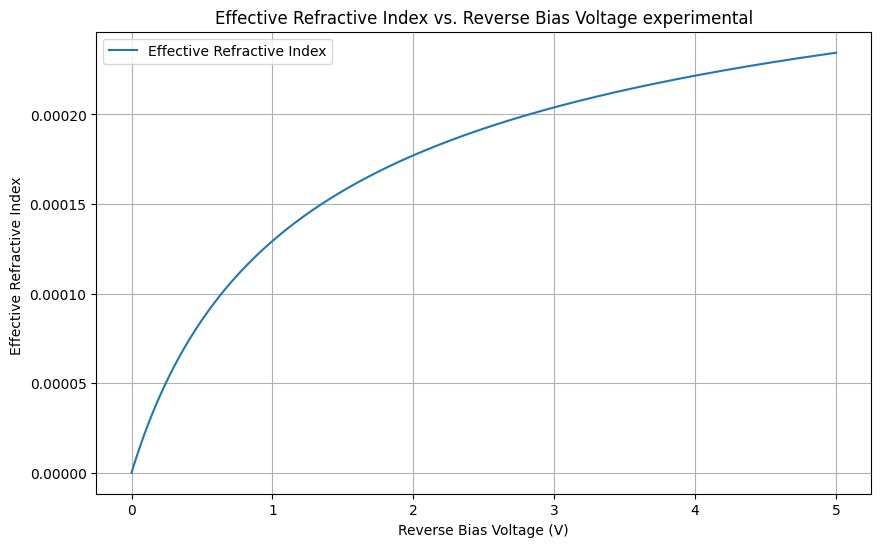

At V_R = 0.0V, n_eff = 3.4201653472100673
At V_R = 1.0V, n_eff = 3.420294676111343
At V_R = 2.0V, n_eff = 3.4203425044698865
At V_R = 3.0V, n_eff = 3.4203692911168133
At V_R = 4.0V, n_eff = 3.4203869895432724
At V_R = 5.0V, n_eff = 3.4203997965988866


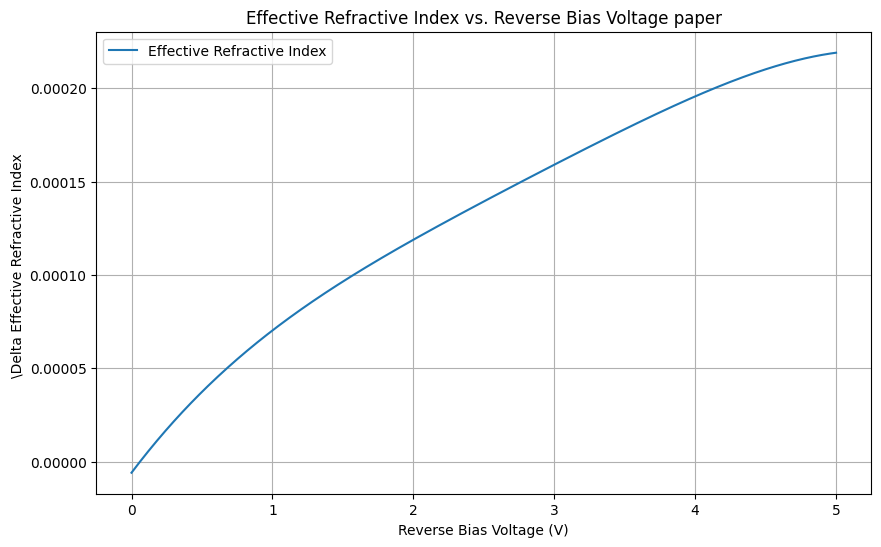

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.854187817e-12  # Permittivity of free space (F/m)
epsilon_inf = 11.7           # High-frequency permittivity for Si
e = 1.602176634e-19          # Elementary charge (C)
m_star = 0.26 * 9.10938356e-31  # Effective mass of electron (kg)
wavelength = 1550e-9         # Wavelength of incident light (m)
omega = 2 * np.pi * 3e8 / wavelength  # Angular frequency of light (rad/s)
V_bi = 0.7                   # Built-in potential (V)
N_A = 5e23                   # Acceptor concentration (m^-3)
N_D = 7e23                   # Donor concentration (m^-3)
gamma = 1e15                 # Collision frequency (1/s)
epsilon_s = epsilon_inf * epsilon_0  # Permittivity of silicon

#We chose implant doses to provide a peak dopant concentration of 5x1017 cm−3 for the n
#region, and 7x1017 cm−3 for the p region (Ultralow drive voltage silicon traveling-wave modulator)

# Function to calculate depletion width
def depletion_width(V_R):
    return np.sqrt(2 * epsilon_s * (V_bi + V_R)*(N_A + N_D) /( e *  (N_A * N_D)))
    #return np.sqrt(2 * epsilon_s * (V_bi + V_R) / (e * (N_A + N_D) / (N_A * N_D)))

# Initial depletion width at zero bias
W_0 = depletion_width(0)

# Function to calculate plasma frequency
def plasma_frequency(V_R):
    W = depletion_width(V_R)
    n_0 = N_A  # Assuming n_0 is the initial carrier density
    n = n_0 * W_0 / W
    return np.sqrt(n * e**2 / (epsilon_0 * m_star))

# Function to calculate permittivity
def permittivity(V_R):
    omega_p = plasma_frequency(V_R)
    return epsilon_inf - omega_p**2 / (omega**2 + 1j * gamma * omega)

# Function to calculate effective refractive index
def n_effective(V_R):
    epsilon = permittivity(V_R)
    return np.sqrt(np.real(epsilon))

def delta_n_formula(V):
    return -6*1e-7*pow(V,4) + 6.8 * 1e-6 * pow(V,3) - 3*1e-5*pow(V,2) + 1e-4*V - 6*1e-6

# Voltage range
V_R_range = np.linspace(0, 5, 500)  # Reverse bias voltage from 0 to 5 V

# Calculate n_eff for each reverse bias voltage
delta_n_eff_values = [(n_effective(V_R)-n_effective(0)) for V_R in V_R_range]# assuming arm 2 to has zero bias delta_n_eff = n_eff in arm1(changing bias) - n_eff (zero bias)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(V_R_range, (delta_n_eff_values), label='Effective Refractive Index')
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('Effective Refractive Index ')
plt.title('Effective Refractive Index vs. Reverse Bias Voltage experimental')
plt.grid(True)
plt.legend()
plt.show()

V_R_range2 = np.arange(0, 5.1, 1)  # Reverse bias voltage from 0 to 5 V at 1V intervals

# Calculate n_eff for each reverse bias voltage
for V_R2 in V_R_range2:
    n_eff2 = n_effective(V_R2)
    print(f"At V_R = {V_R2}V, n_eff = {n_eff2}")


delta_neff_value_2 = [delta_n_formula(V_R) for V_R in V_R_range]
plt.figure(figsize=(10, 6))
plt.plot(V_R_range, delta_neff_value_2, label='Effective Refractive Index')
plt.xlabel('Reverse Bias Voltage (V)')
plt.ylabel('\Delta Effective Refractive Index ')
plt.title('Effective Refractive Index vs. Reverse Bias Voltage paper')
plt.grid(True)
plt.legend()
plt.show()